In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("ObesityDataSet.csv")
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [4]:
display(df.describe(), df.describe(include='object'))

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,2015,1401,1580,351


In [5]:
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [6]:
for col_name, value in df.select_dtypes(include='object').items():
    print("Unique data dari kolom {}: {}".format(col_name, df.select_dtypes(include='object')[col_name].unique()))

Unique data dari kolom Gender: ['Female' 'Male']
Unique data dari kolom family_history_with_overweight: ['yes' 'no']
Unique data dari kolom FAVC: ['no' 'yes']
Unique data dari kolom CAEC: ['Sometimes' 'Frequently' 'Always' 'no']
Unique data dari kolom SMOKE: ['no' 'yes']
Unique data dari kolom SCC: ['no' 'yes']
Unique data dari kolom CALC: ['no' 'Sometimes' 'Frequently' 'Always']
Unique data dari kolom MTRANS: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
Unique data dari kolom NObeyesdad: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [7]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df[['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']] = df[['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']].apply(encoder.fit_transform)
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3,1
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,3,1
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3,1
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,4,5
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3,4
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3,4
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3,4
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3,4


In [8]:
# df.to_csv('ObesityDataSet_encoded.csv')

In [9]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3,1
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,3,1
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3,1
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,4,5
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3,4
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3,4
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3,4
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3,4


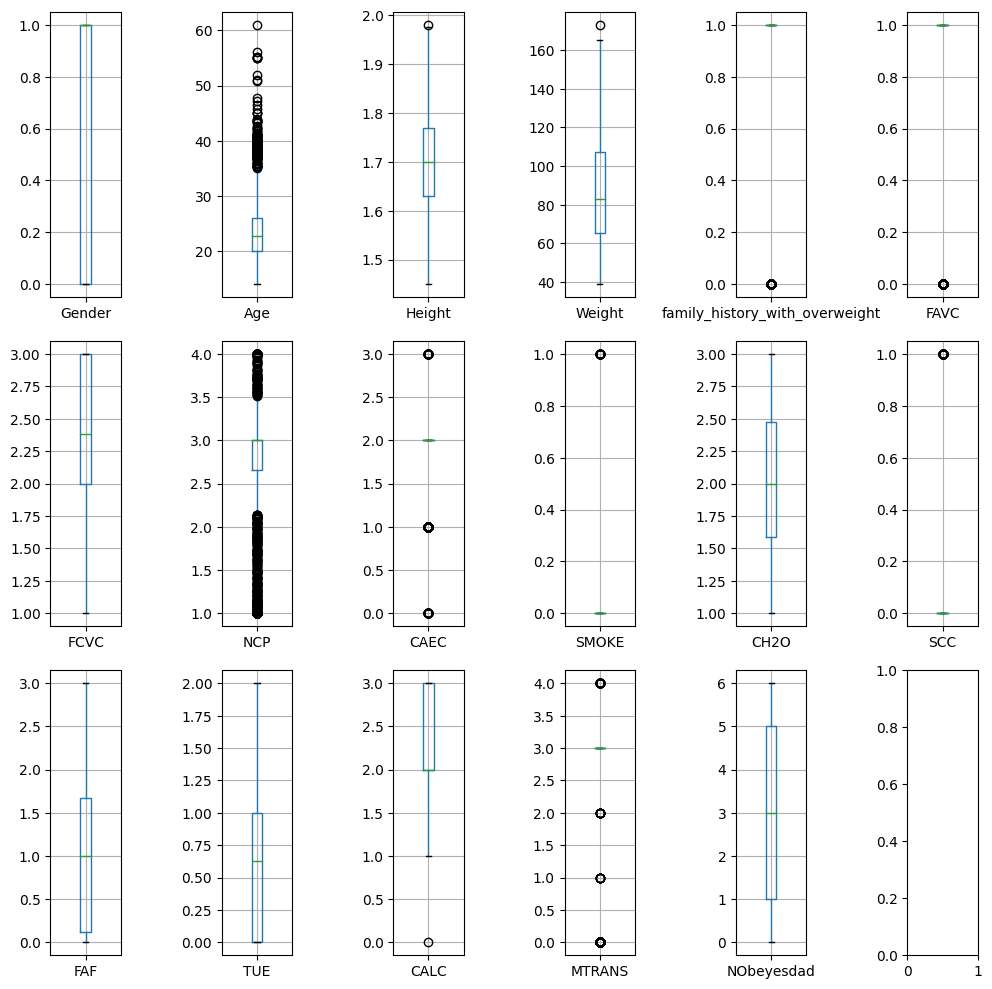

In [10]:
# Outlier Checking

list_columns = list(df.columns.values)

num_rows = 3
num_cols = 6

fig, ax = plt.subplots(num_rows, num_cols, figsize=(10,10))

for i, column_name in enumerate(list_columns):
    df.boxplot(column_name, ax=ax.flatten()[i])
    

plt.tight_layout()
plt.show()

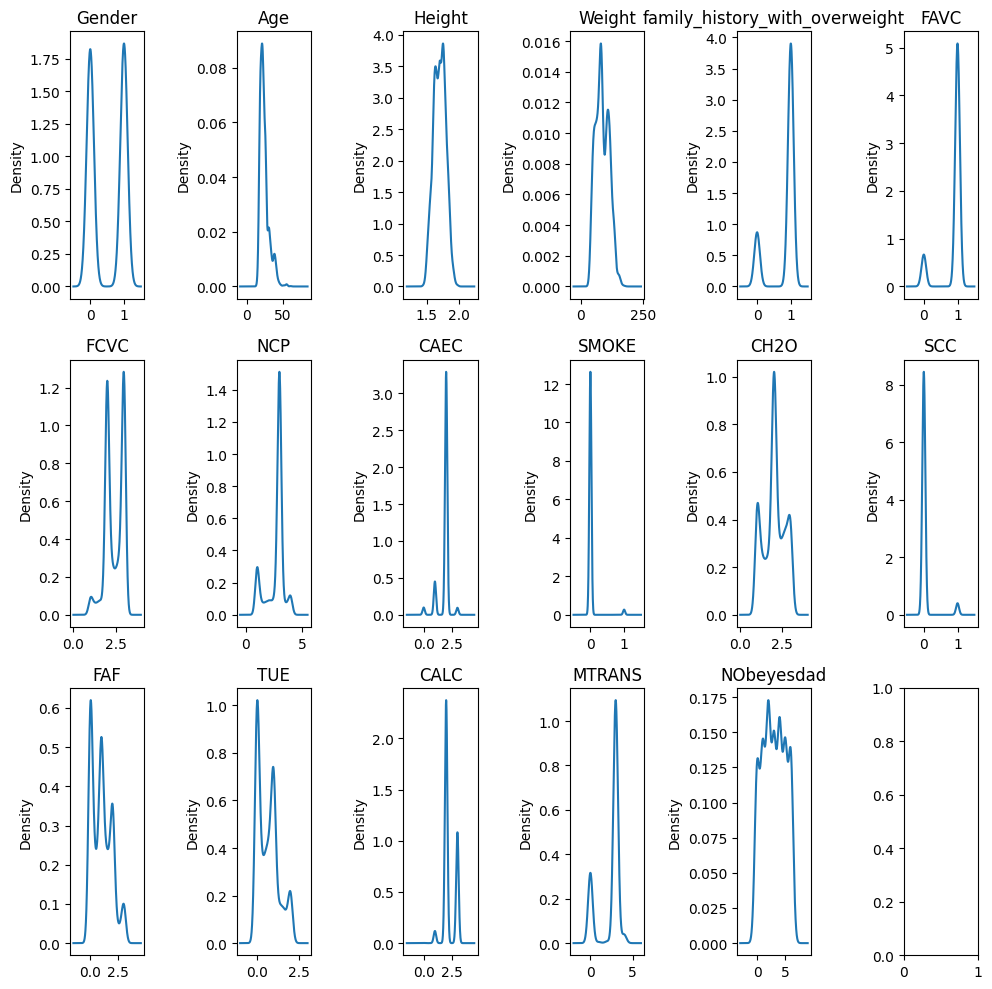

In [11]:
# Distribution of Data
 
list_columns = list(df.columns.values)

num_rows = 3
num_cols = 6

fig, ax = plt.subplots(num_rows, num_cols, figsize=(10,10))

for i, column_name in enumerate(list_columns):
    df[column_name].plot(ax=ax.flatten()[i], kind='kde')
    ax.flatten()[i].set_title(column_name)

plt.tight_layout()
plt.show()

# Data Pre-processing 

In [12]:
df.corr()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
Gender,1.000000,0.048394,0.618466,0.161668,0.102512,0.064934,-0.274505,0.067600,0.091543,0.044698,0.107930,-0.102633,0.189607,0.017269,0.007616,-0.137537,0.024908
Age,0.048394,1.000000,-0.025958,0.202560,0.205725,0.063902,0.016291,-0.043944,0.083739,0.091987,-0.045304,-0.116283,-0.144938,-0.296931,-0.044487,-0.601945,0.236170
Height,0.618466,-0.025958,1.000000,0.463136,0.247684,0.178364,-0.038121,0.243672,0.048818,0.055499,0.213376,-0.133753,0.294709,0.051912,-0.129732,-0.073609,0.038986
Weight,0.161668,0.202560,0.463136,1.000000,0.496820,0.272300,0.216125,0.107469,0.287493,0.025746,0.200575,-0.201906,-0.051436,-0.071561,-0.206677,0.004610,0.387643
family_history_with_overweight,0.102512,0.205725,0.247684,0.496820,1.000000,0.208036,0.040372,0.071370,0.169787,0.017385,0.147437,-0.185422,-0.056673,0.022943,0.036676,-0.101540,0.313667
FAVC,0.064934,0.063902,0.178364,0.272300,0.208036,1.000000,-0.027283,-0.007000,0.150068,-0.050660,0.009719,-0.190658,-0.107995,0.068417,-0.089520,-0.069800,0.044582
FCVC,-0.274505,0.016291,-0.038121,0.216125,0.040372,-0.027283,1.000000,0.042216,-0.054670,0.014320,0.068461,0.071852,0.019939,-0.101135,-0.060781,0.064743,0.018522
NCP,0.067600,-0.043944,0.243672,0.107469,0.071370,-0.007000,0.042216,1.000000,-0.097801,0.007811,0.057088,-0.015624,0.129504,0.036326,-0.071747,-0.053858,-0.092616
CAEC,0.091543,0.083739,0.048818,0.287493,0.169787,0.150068,-0.054670,-0.097801,1.000000,-0.055282,0.144995,-0.109179,-0.030110,-0.048567,-0.047540,-0.048535,0.327295
SMOKE,0.044698,0.091987,0.055499,0.025746,0.017385,-0.050660,0.014320,0.007811,-0.055282,1.000000,-0.031995,0.047731,0.011216,0.017613,-0.082471,-0.010702,-0.023256


In [13]:
from sklearn.preprocessing import QuantileTransformer

quantile_trans = QuantileTransformer(n_quantiles=df.shape[0], output_distribution='normal')
df_scaled = quantile_trans.fit_transform(df)

In [14]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,-5.199338,-0.407166,-0.814009,-0.749502,5.199338,-5.199338,-0.713793,0.271792,0.145444,-5.199338,-0.074912,-5.199338,-5.199338,0.642031,5.199338,0.251507,-0.853531
1,-5.199338,-0.407166,-2.036440,-1.045624,5.199338,-5.199338,5.199338,0.271792,0.145444,5.199338,5.199338,5.199338,5.199338,-5.199338,-0.344054,0.251507,-0.853531
2,5.199338,0.112501,1.016317,-0.327714,5.199338,-5.199338,-0.713793,0.271792,0.145444,-5.199338,-0.074912,-5.199338,1.104920,0.642031,-2.124249,0.251507,-0.853531
3,5.199338,0.791058,1.016317,0.146645,-5.199338,-5.199338,5.199338,0.271792,0.145444,-5.199338,-0.074912,-5.199338,1.104920,-5.199338,-2.124249,5.199338,0.821477
4,5.199338,-0.108915,0.785386,0.213061,-5.199338,-5.199338,-0.713793,-5.199338,0.145444,-5.199338,-0.074912,-5.199338,-5.199338,-5.199338,-0.344054,0.251507,5.199338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,-5.199338,-0.478594,0.089216,1.615691,5.199338,5.199338,5.199338,0.271792,0.145444,-5.199338,-0.562964,-5.199338,0.681216,0.321453,-0.344054,0.251507,0.381485
2107,-5.199338,-0.138244,0.382124,1.829675,5.199338,5.199338,5.199338,0.271792,0.145444,-5.199338,0.205775,-5.199338,0.448173,-0.024950,-0.344054,0.251507,0.381485
2108,-5.199338,-0.039213,0.462669,1.817149,5.199338,5.199338,5.199338,0.271792,0.145444,-5.199338,0.273025,-5.199338,0.485265,0.022573,-0.344054,0.251507,0.381485
2109,-5.199338,0.322704,0.289091,1.736562,5.199338,5.199338,5.199338,0.271792,0.145444,-5.199338,1.189805,-5.199338,0.317702,-0.035647,-0.344054,0.251507,0.381485


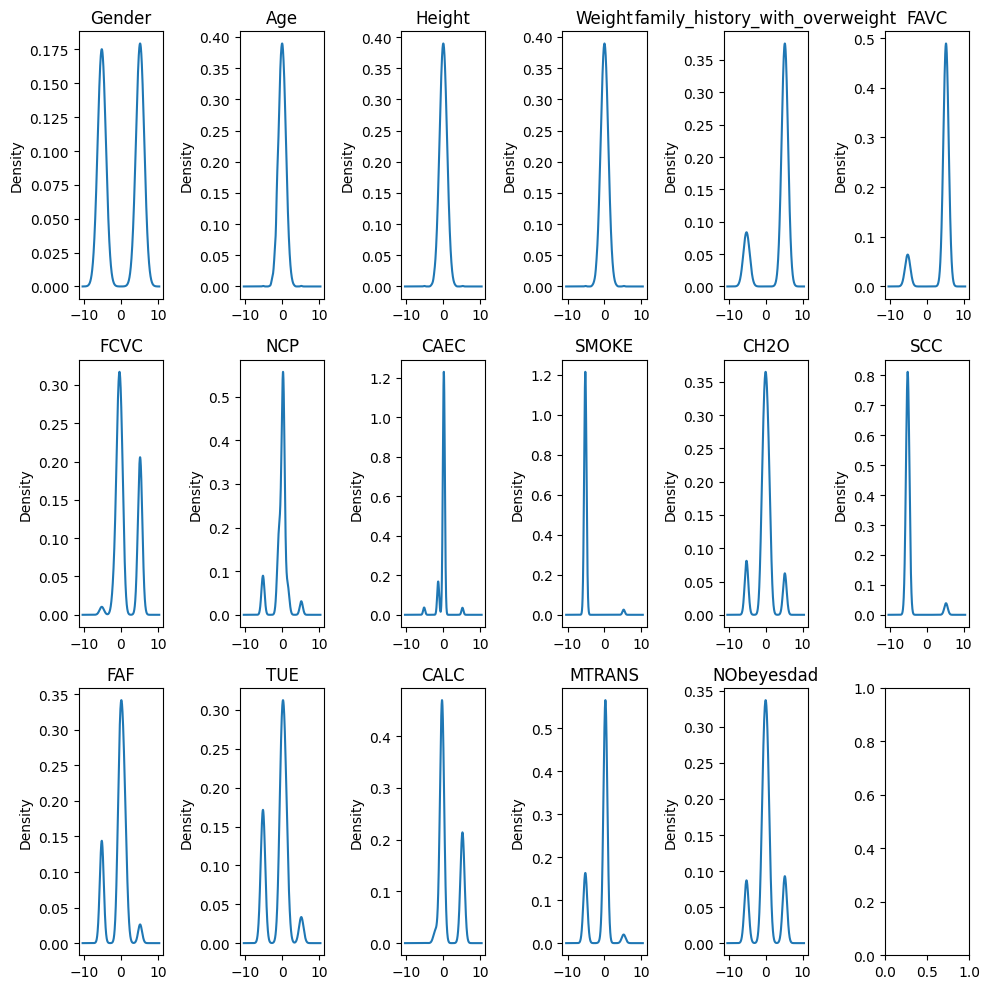

In [15]:
list_columns = list(df_scaled.columns.values)

num_rows = 3
num_cols = 6

fig, ax = plt.subplots(num_rows, num_cols, figsize=(10,10))

for i, column_name in enumerate(list_columns):
    df_scaled[column_name].plot(ax=ax.flatten()[i], kind='kde')
    ax.flatten()[i].set_title(column_name)

plt.tight_layout()
plt.show()

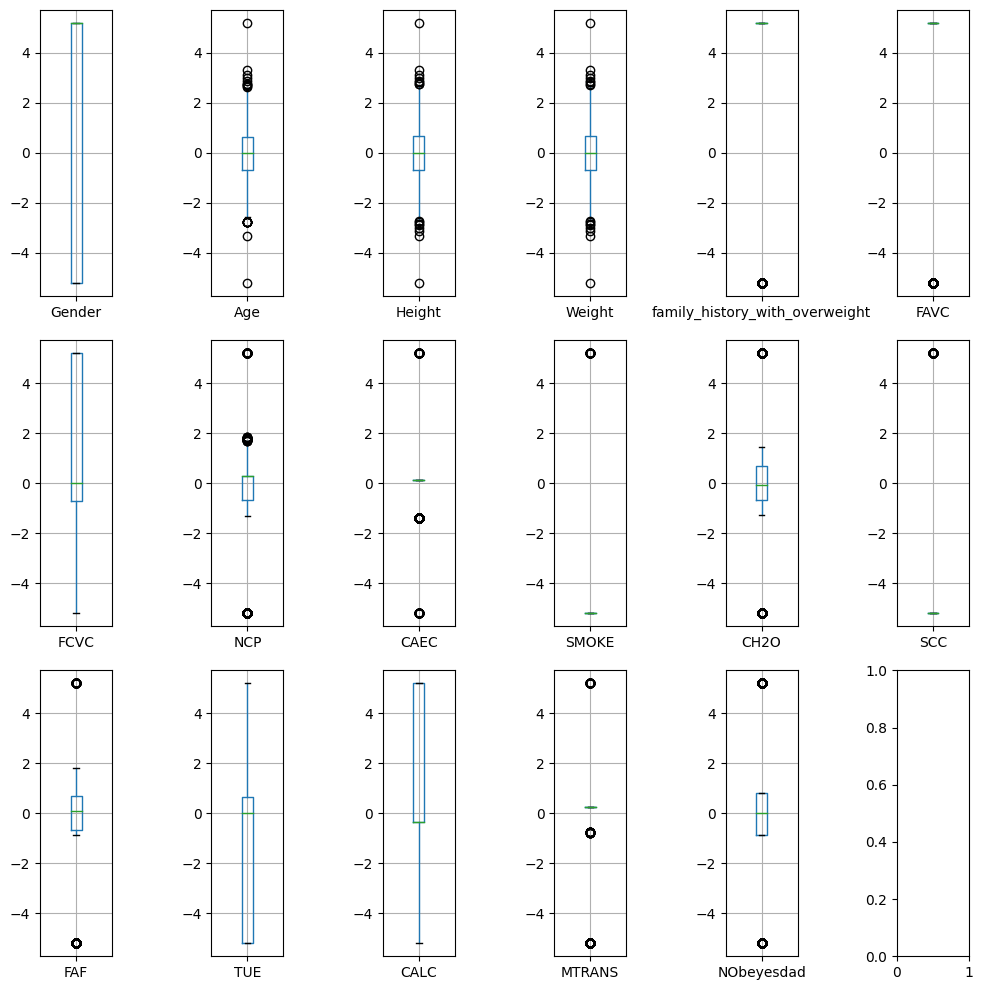

In [16]:
list_columns = list(df_scaled.columns.values)

num_rows = 3
num_cols = 6

fig, ax = plt.subplots(num_rows, num_cols, figsize=(10, 10))

for i, column_name in enumerate(list_columns):
    df_scaled.boxplot(column_name, ax=ax.flatten()[i])

plt.tight_layout()
plt.show()

In [17]:
# Outlier Persentation

for i, j in df_scaled.items():
    q1 = j.quantile(0.25)
    q3 = j.quantile(0.75)
    inter_q = q3 - q1

    j_col = j[(j <= q1 - 1.5 * inter_q) | (j >= q3 + 1.5 * inter_q)]
    percent = np.shape(j_col)[0] * 100.0 / np.shape(df)[0]
    print("Column %s outliers = %.2f" %(i, percent))

Column Gender outliers = 0.00
Column Age outliers = 0.99
Column Height outliers = 0.76
Column Weight outliers = 0.76
Column family_history_with_overweight outliers = 100.00
Column FAVC outliers = 100.00
Column FCVC outliers = 0.00
Column NCP outliers = 13.97
Column CAEC outliers = 100.00
Column SMOKE outliers = 100.00
Column CH2O outliers = 17.67
Column SCC outliers = 100.00
Column FAF outliers = 23.02
Column TUE outliers = 0.00
Column CALC outliers = 0.00
Column MTRANS outliers = 100.00
Column NObeyesdad outliers = 26.62


In [18]:
Q1 = df_scaled.quantile(0.25)
Q3 = df_scaled.quantile(0.75)
IQR = Q3 - Q1

new_df_filtered = df_scaled[~((df_scaled < (Q1 - 1.5 * IQR)) | (df_scaled > (Q3 + 1.5 * IQR))).any(axis=1)]
print(new_df_filtered)

        Gender       Age    Height    Weight  family_history_with_overweight  \
8     5.199338  0.267480  0.785386 -0.749502                        5.199338   
9     5.199338 -0.108915  0.170706 -0.607375                        5.199338   
38    5.199338  0.112501 -0.465977 -0.640572                        5.199338   
40   -5.199338 -0.407166 -0.288472 -0.398148                        5.199338   
118   5.199338  0.112501 -0.814009 -1.179024                        5.199338   
...        ...       ...       ...       ...                             ...   
2106 -5.199338 -0.478594  0.089216  1.615691                        5.199338   
2107 -5.199338 -0.138244  0.382124  1.829675                        5.199338   
2108 -5.199338 -0.039213  0.462669  1.817149                        5.199338   
2109 -5.199338  0.322704  0.289091  1.736562                        5.199338   
2110 -5.199338  0.230106  0.284140  1.758438                        5.199338   

          FAVC      FCVC       NCP     

In [19]:
new_df_filtered = pd.DataFrame(new_df_filtered, columns=df_scaled.columns)

new_df_filtered

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
8,5.199338,0.267480,0.785386,-0.749502,5.199338,5.199338,5.199338,0.271792,0.145444,-5.199338,-0.074912,-5.199338,0.086235,0.642031,-2.124249,0.251507,-0.853531
9,5.199338,-0.108915,0.170706,-0.607375,5.199338,5.199338,-0.713793,0.271792,0.145444,-5.199338,-0.074912,-5.199338,0.086235,0.642031,5.199338,0.251507,-0.853531
38,5.199338,0.112501,-0.465977,-0.640572,5.199338,5.199338,-0.713793,0.271792,0.145444,-5.199338,-0.074912,-5.199338,0.086235,0.642031,-0.344054,0.251507,-0.853531
40,-5.199338,-0.407166,-0.288472,-0.398148,5.199338,5.199338,-0.713793,0.271792,0.145444,-5.199338,-0.074912,-5.199338,0.086235,-5.199338,-0.344054,0.251507,0.821477
118,5.199338,0.112501,-0.814009,-1.179024,5.199338,5.199338,-0.713793,0.271792,0.145444,-5.199338,-0.074912,-5.199338,0.086235,0.642031,-0.344054,0.251507,-0.853531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,-5.199338,-0.478594,0.089216,1.615691,5.199338,5.199338,5.199338,0.271792,0.145444,-5.199338,-0.562964,-5.199338,0.681216,0.321453,-0.344054,0.251507,0.381485
2107,-5.199338,-0.138244,0.382124,1.829675,5.199338,5.199338,5.199338,0.271792,0.145444,-5.199338,0.205775,-5.199338,0.448173,-0.024950,-0.344054,0.251507,0.381485
2108,-5.199338,-0.039213,0.462669,1.817149,5.199338,5.199338,5.199338,0.271792,0.145444,-5.199338,0.273025,-5.199338,0.485265,0.022573,-0.344054,0.251507,0.381485
2109,-5.199338,0.322704,0.289091,1.736562,5.199338,5.199338,5.199338,0.271792,0.145444,-5.199338,1.189805,-5.199338,0.317702,-0.035647,-0.344054,0.251507,0.381485


# PEMODELAN

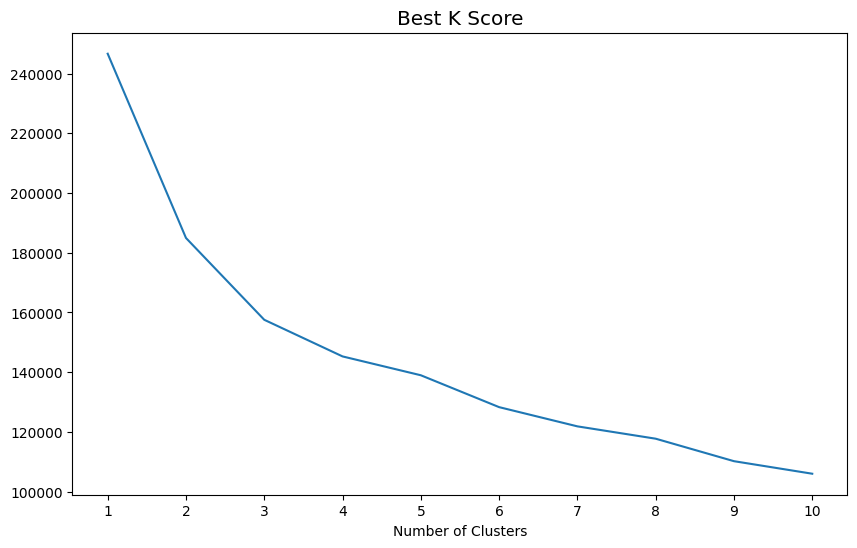

In [20]:
from sklearn.cluster import KMeans

score = []
k_value = range(1, 11)

for k in k_value:
    kmeans = KMeans(n_clusters= k, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    cluster = kmeans.fit_predict(df_scaled)
    score.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(k_value, score)
plt.xlabel('Number of Clusters')
plt.xticks(k_value)
plt.style.use('ggplot')
plt.title('Best K Score')
plt.show()

 For k = 2, the silhouette score is: [0.272019662152758]
 For k = 3, the silhouette score is: [0.28321570402605617]
 For k = 4, the silhouette score is: [0.2876629131714852]
 For k = 5, the silhouette score is: [0.24605464918352743]
 For k = 6, the silhouette score is: [0.2674496650285174]
 For k = 7, the silhouette score is: [0.2151141225011698]
 For k = 8, the silhouette score is: [0.2104723510344175]


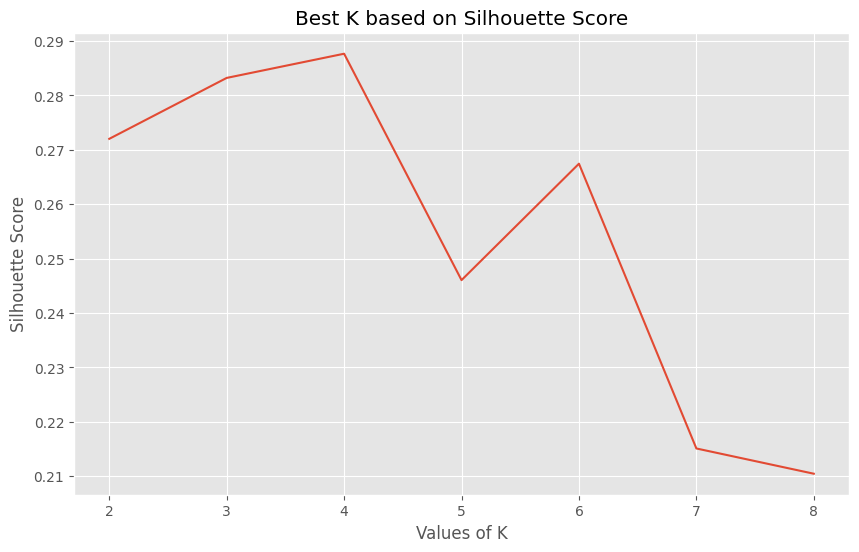

In [21]:
# Calculate Silhouette Score (Outlier dihapus)

from sklearn.metrics import silhouette_score

k_value = [2, 3, 4, 5, 6, 7, 8]
scores = {}

for k in k_value:
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(df_scaled)
    cluster_labels = kmeans.predict(df_scaled)

    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    scores[k] = [silhouette_avg]

for k, value in scores.items():
    print(" For k = {}, the silhouette score is: {}".format(k, value))

key = list(scores.keys())
value = list(scores.values())

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(key, value)
plt.xlabel('Values of K')
plt.xticks(k_value)
plt.ylabel('Silhouette Score')
plt.style.use('ggplot')
plt.title('Best K based on Silhouette Score')
plt.show()

In [22]:
from sklearn.metrics import davies_bouldin_score

k_value = [2, 3, 4, 5, 6, 7, 8]
scores = {}

for k in k_value:
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(df_scaled)
    cluster_labels = kmeans.predict(df_scaled)

    db_score = davies_bouldin_score(df_scaled, cluster_labels)
    scores[k] = [db_score]

for k, value in scores.items():
    print(" For k = {}, the davies-bouldin score is: {}".format(k, value))

 For k = 2, the davies-bouldin score is: [1.5997249136371543]
 For k = 3, the davies-bouldin score is: [1.519858934578756]
 For k = 4, the davies-bouldin score is: [1.6111251196987857]
 For k = 5, the davies-bouldin score is: [1.886636389663971]
 For k = 6, the davies-bouldin score is: [1.5374535690421622]
 For k = 7, the davies-bouldin score is: [1.7704661860729658]
 For k = 8, the davies-bouldin score is: [1.8183760511407165]


In [23]:
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=10000, random_state=42)
kmeans.fit(df_scaled)
df_scaled['cluster'] = kmeans.labels_

df_scaled

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,cluster
0,-5.199338,-0.407166,-0.814009,-0.749502,5.199338,-5.199338,-0.713793,0.271792,0.145444,-5.199338,-0.074912,-5.199338,-5.199338,0.642031,5.199338,0.251507,-0.853531,3
1,-5.199338,-0.407166,-2.036440,-1.045624,5.199338,-5.199338,5.199338,0.271792,0.145444,5.199338,5.199338,5.199338,5.199338,-5.199338,-0.344054,0.251507,-0.853531,3
2,5.199338,0.112501,1.016317,-0.327714,5.199338,-5.199338,-0.713793,0.271792,0.145444,-5.199338,-0.074912,-5.199338,1.104920,0.642031,-2.124249,0.251507,-0.853531,3
3,5.199338,0.791058,1.016317,0.146645,-5.199338,-5.199338,5.199338,0.271792,0.145444,-5.199338,-0.074912,-5.199338,1.104920,-5.199338,-2.124249,5.199338,0.821477,3
4,5.199338,-0.108915,0.785386,0.213061,-5.199338,-5.199338,-0.713793,-5.199338,0.145444,-5.199338,-0.074912,-5.199338,-5.199338,-5.199338,-0.344054,0.251507,5.199338,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,-5.199338,-0.478594,0.089216,1.615691,5.199338,5.199338,5.199338,0.271792,0.145444,-5.199338,-0.562964,-5.199338,0.681216,0.321453,-0.344054,0.251507,0.381485,1
2107,-5.199338,-0.138244,0.382124,1.829675,5.199338,5.199338,5.199338,0.271792,0.145444,-5.199338,0.205775,-5.199338,0.448173,-0.024950,-0.344054,0.251507,0.381485,1
2108,-5.199338,-0.039213,0.462669,1.817149,5.199338,5.199338,5.199338,0.271792,0.145444,-5.199338,0.273025,-5.199338,0.485265,0.022573,-0.344054,0.251507,0.381485,1
2109,-5.199338,0.322704,0.289091,1.736562,5.199338,5.199338,5.199338,0.271792,0.145444,-5.199338,1.189805,-5.199338,0.317702,-0.035647,-0.344054,0.251507,0.381485,1


<Figure size 800x800 with 0 Axes>

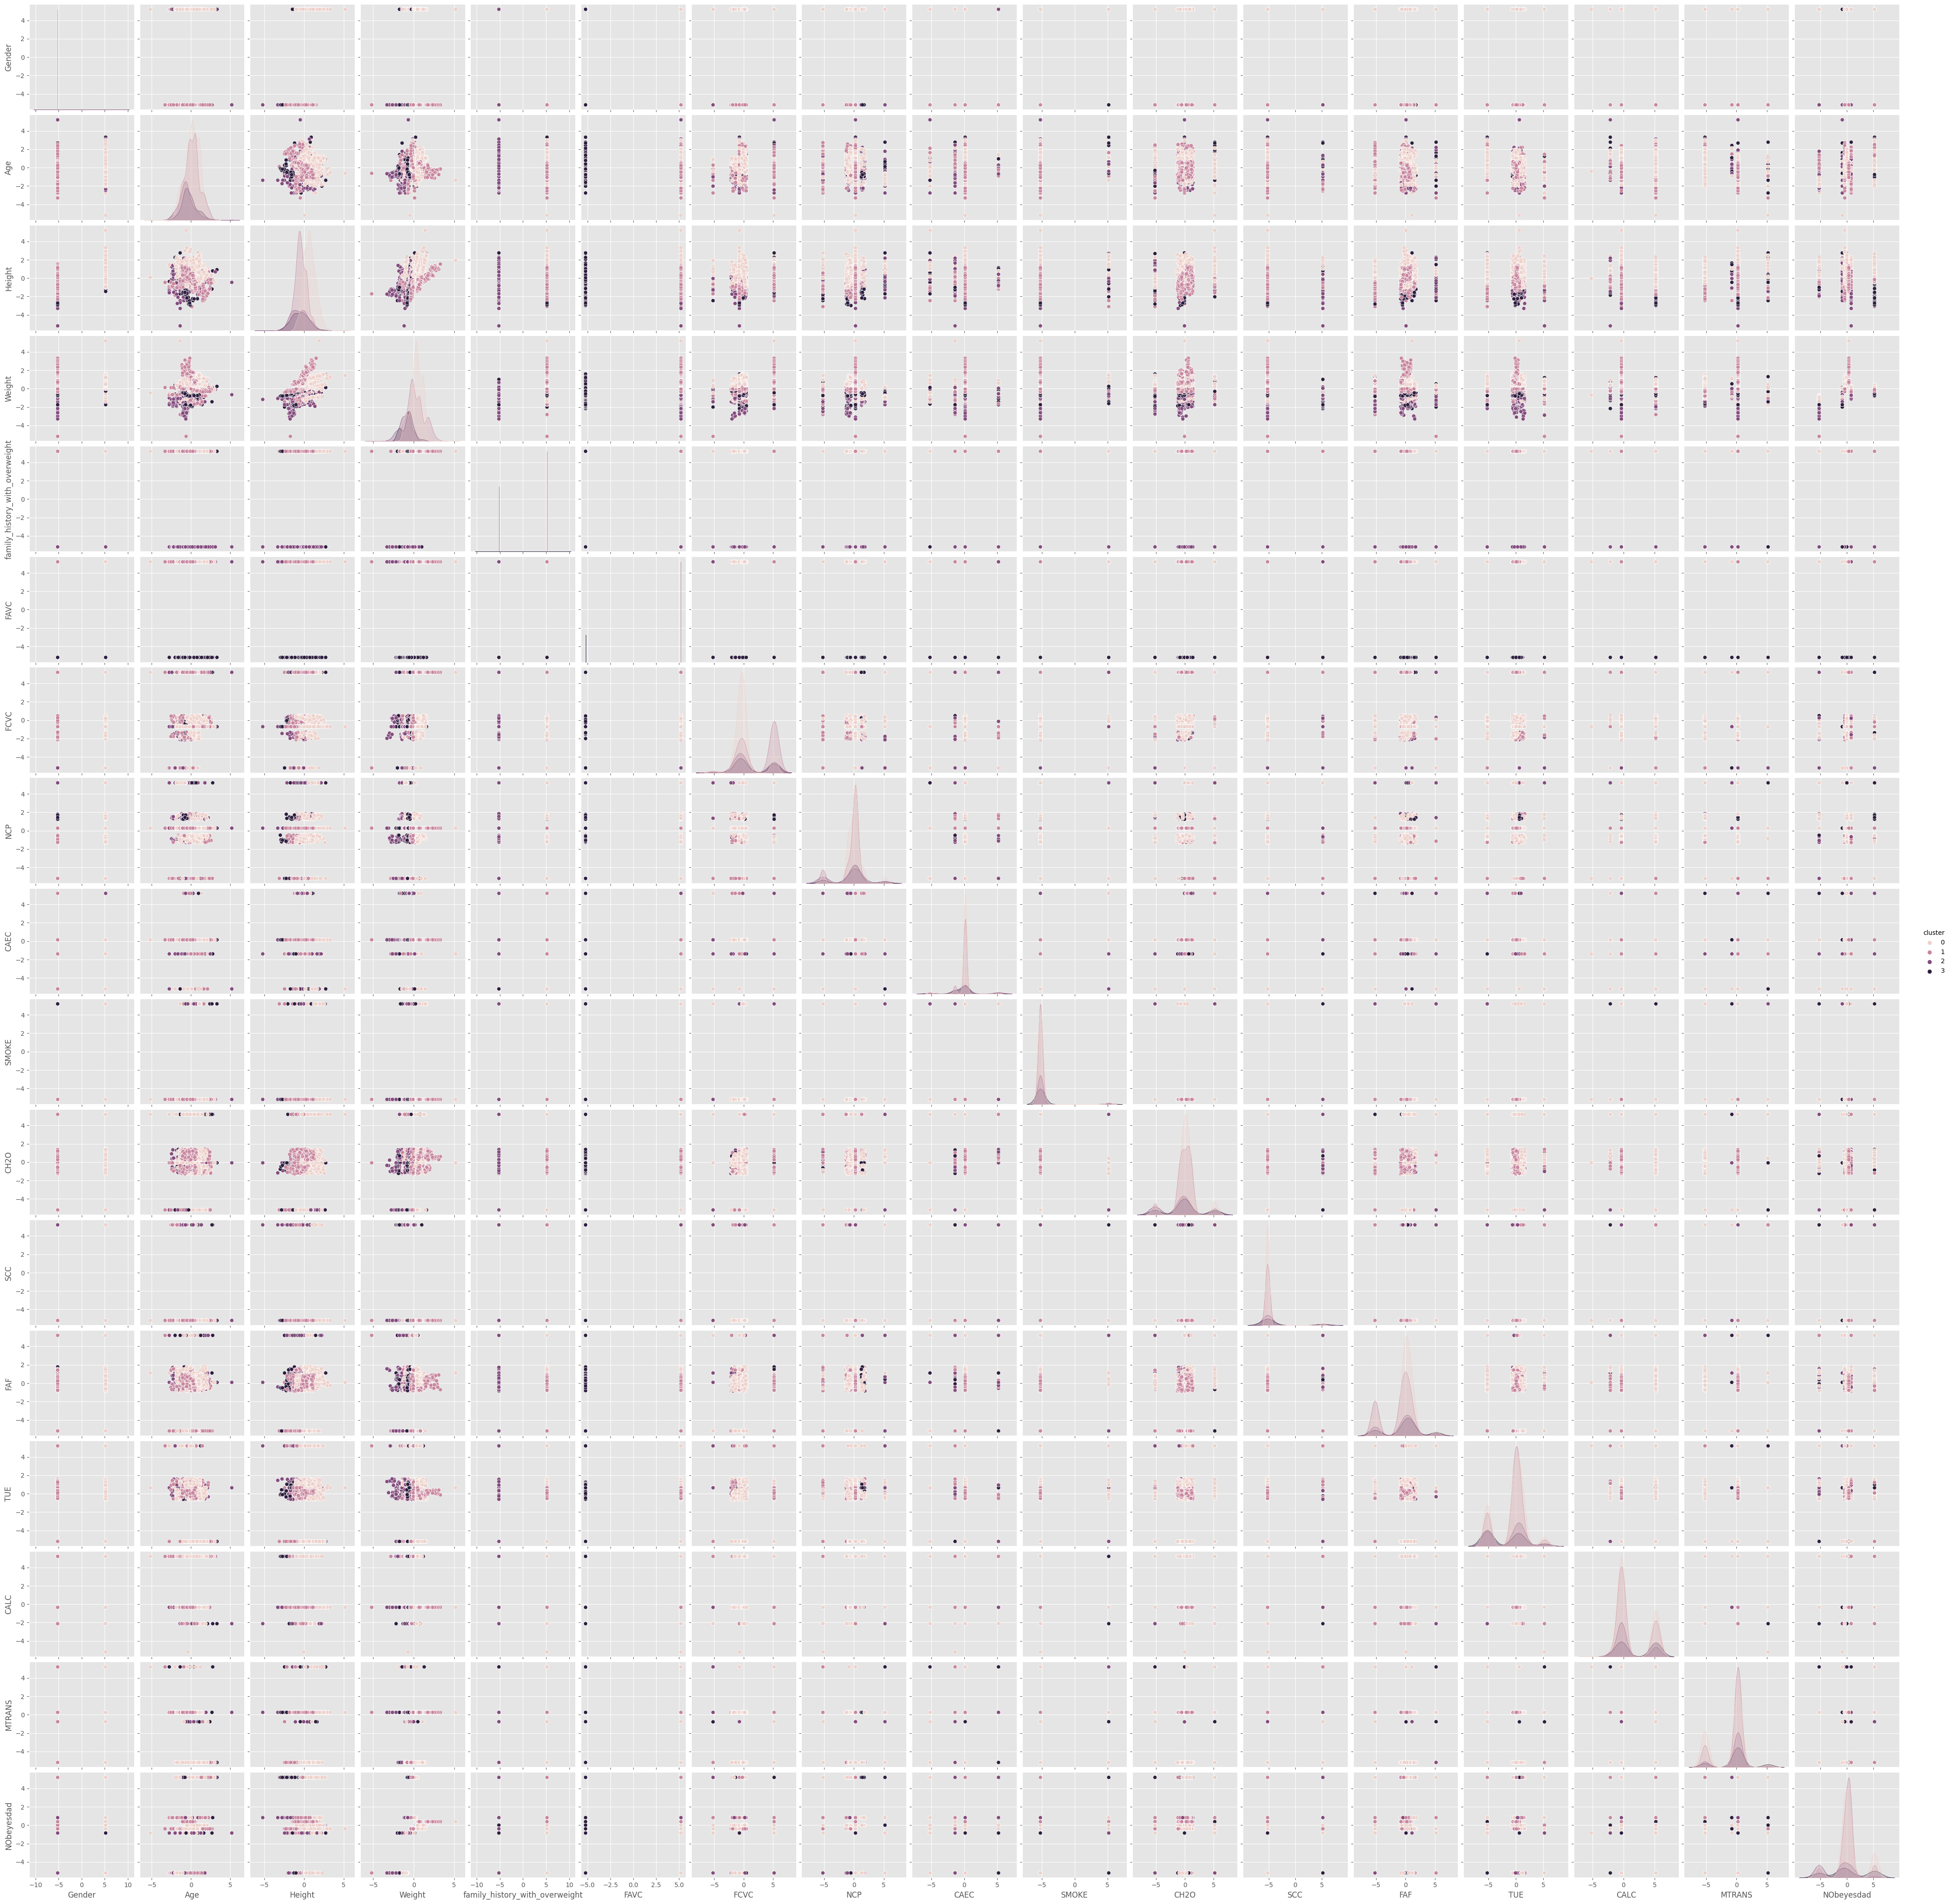

In [22]:
import seaborn as sns 

plt.figure(figsize=(8,8))
sns.pairplot(data=df_scaled, hue='cluster')

In [23]:
df_pca = df_scaled.loc[:, ~df_scaled.columns.isin(['cluster'])]
df_pca

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,-5.199338,-0.407166,-0.814009,-0.749502,5.199338,-5.199338,-0.713793,0.271792,0.145444,-5.199338,-0.074912,-5.199338,-5.199338,0.642031,5.199338,0.251507,-0.853531
1,-5.199338,-0.407166,-2.036440,-1.045624,5.199338,-5.199338,5.199338,0.271792,0.145444,5.199338,5.199338,5.199338,5.199338,-5.199338,-0.344054,0.251507,-0.853531
2,5.199338,0.112501,1.016317,-0.327714,5.199338,-5.199338,-0.713793,0.271792,0.145444,-5.199338,-0.074912,-5.199338,1.104920,0.642031,-2.124249,0.251507,-0.853531
3,5.199338,0.791058,1.016317,0.146645,-5.199338,-5.199338,5.199338,0.271792,0.145444,-5.199338,-0.074912,-5.199338,1.104920,-5.199338,-2.124249,5.199338,0.821477
4,5.199338,-0.108915,0.785386,0.213061,-5.199338,-5.199338,-0.713793,-5.199338,0.145444,-5.199338,-0.074912,-5.199338,-5.199338,-5.199338,-0.344054,0.251507,5.199338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,-5.199338,-0.478594,0.089216,1.615691,5.199338,5.199338,5.199338,0.271792,0.145444,-5.199338,-0.562964,-5.199338,0.681216,0.321453,-0.344054,0.251507,0.381485
2107,-5.199338,-0.138244,0.382124,1.829675,5.199338,5.199338,5.199338,0.271792,0.145444,-5.199338,0.205775,-5.199338,0.448173,-0.024950,-0.344054,0.251507,0.381485
2108,-5.199338,-0.039213,0.462669,1.817149,5.199338,5.199338,5.199338,0.271792,0.145444,-5.199338,0.273025,-5.199338,0.485265,0.022573,-0.344054,0.251507,0.381485
2109,-5.199338,0.322704,0.289091,1.736562,5.199338,5.199338,5.199338,0.271792,0.145444,-5.199338,1.189805,-5.199338,0.317702,-0.035647,-0.344054,0.251507,0.381485


In [24]:
df_scaled

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,cluster
0,-5.199338,-0.407166,-0.814009,-0.749502,5.199338,-5.199338,-0.713793,0.271792,0.145444,-5.199338,-0.074912,-5.199338,-5.199338,0.642031,5.199338,0.251507,-0.853531,3
1,-5.199338,-0.407166,-2.036440,-1.045624,5.199338,-5.199338,5.199338,0.271792,0.145444,5.199338,5.199338,5.199338,5.199338,-5.199338,-0.344054,0.251507,-0.853531,3
2,5.199338,0.112501,1.016317,-0.327714,5.199338,-5.199338,-0.713793,0.271792,0.145444,-5.199338,-0.074912,-5.199338,1.104920,0.642031,-2.124249,0.251507,-0.853531,3
3,5.199338,0.791058,1.016317,0.146645,-5.199338,-5.199338,5.199338,0.271792,0.145444,-5.199338,-0.074912,-5.199338,1.104920,-5.199338,-2.124249,5.199338,0.821477,3
4,5.199338,-0.108915,0.785386,0.213061,-5.199338,-5.199338,-0.713793,-5.199338,0.145444,-5.199338,-0.074912,-5.199338,-5.199338,-5.199338,-0.344054,0.251507,5.199338,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,-5.199338,-0.478594,0.089216,1.615691,5.199338,5.199338,5.199338,0.271792,0.145444,-5.199338,-0.562964,-5.199338,0.681216,0.321453,-0.344054,0.251507,0.381485,1
2107,-5.199338,-0.138244,0.382124,1.829675,5.199338,5.199338,5.199338,0.271792,0.145444,-5.199338,0.205775,-5.199338,0.448173,-0.024950,-0.344054,0.251507,0.381485,1
2108,-5.199338,-0.039213,0.462669,1.817149,5.199338,5.199338,5.199338,0.271792,0.145444,-5.199338,0.273025,-5.199338,0.485265,0.022573,-0.344054,0.251507,0.381485,1
2109,-5.199338,0.322704,0.289091,1.736562,5.199338,5.199338,5.199338,0.271792,0.145444,-5.199338,1.189805,-5.199338,0.317702,-0.035647,-0.344054,0.251507,0.381485,1


In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_pca)

df_pca

array([[ 5.52297021,  0.169223  ],
       [ 6.38404636,  2.07396739],
       [-4.70706612,  3.14581927],
       ...,
       [ 4.83965323, -4.21037056],
       [ 4.80650167, -4.28156363],
       [ 4.81168179, -4.30269251]])

In [26]:
df_pca = pd.DataFrame(df_pca, columns=['PC 1', 'PC2'])
df_pca['cluster'] = df_scaled.loc[:, df_scaled.columns.isin(['cluster'])]

df_pca

,PC 1,PC2,cluster
0,5.522970,0.169223,3
1,6.384046,2.073967,3
2,-4.707066,3.145819,3
3,-0.826023,11.566313,3
4,-2.199438,10.402361,3
...,...,...,...
2106,4.941342,-4.119013,1
2107,4.859699,-4.198173,1
2108,4.839653,-4.210371,1
2109,4.806502,-4.281564,1


<Figure size 800x800 with 0 Axes>

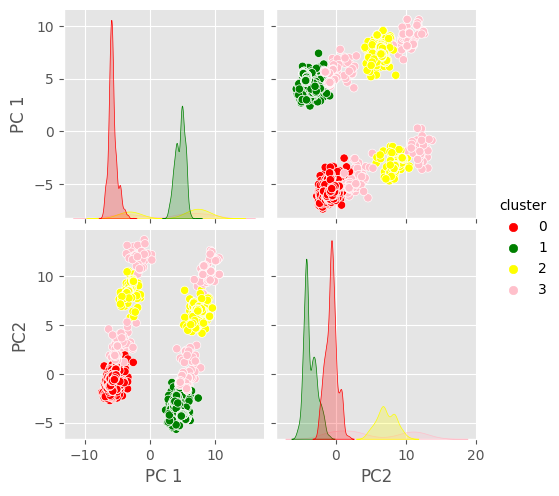

In [27]:
import seaborn as sns 

plt.figure(figsize=(8,8))
sns.pairplot(data=df_pca, hue='cluster', palette=['red', 'green', 'yellow', 'pink'])